In [308]:
import pandas as pd

In [309]:
df = pd.read_csv("PLmatches.csv")
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,Match Report,NaN,18.0,5.0,14.8,0.0,0,0,2024,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,Match Report,NaN,19.0,8.0,13.6,1.0,0,0,2024,Liverpool
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,Match Report,NaN,11.0,3.0,13.4,0.0,0,0,2024,Liverpool
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,Match Report,NaN,14.0,5.0,14.9,0.0,0,0,2024,Liverpool
4,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,Match Report,NaN,19.0,12.0,16.6,0.0,0,0,2024,Liverpool


In [310]:

df['team'].value_counts()
df['round'].value_counts()

round
Matchweek 1     160
Matchweek 17    160
Matchweek 28    160
Matchweek 27    160
Matchweek 26    160
Matchweek 25    160
Matchweek 15    160
Matchweek 24    160
Matchweek 23    160
Matchweek 22    160
Matchweek 2     160
Matchweek 20    160
Matchweek 19    160
Matchweek 18    160
Matchweek 21    160
Matchweek 16    160
Matchweek 8     160
Matchweek 3     160
Matchweek 4     160
Matchweek 14    160
Matchweek 6     160
Matchweek 7     160
Matchweek 5     160
Matchweek 9     160
Matchweek 10    160
Matchweek 11    160
Matchweek 12    160
Matchweek 13    160
Matchweek 29    158
Matchweek 30    140
Matchweek 31    140
Matchweek 32    140
Matchweek 33    140
Matchweek 35    140
Matchweek 36    140
Matchweek 37    140
Matchweek 34    140
Matchweek 38    140
Name: count, dtype: int64

In [311]:

df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5898 non-null   datetime64[ns]
 1   time           5898 non-null   object        
 2   comp           5898 non-null   object        
 3   round          5898 non-null   object        
 4   day            5898 non-null   object        
 5   venue          5898 non-null   object        
 6   result         5898 non-null   object        
 7   gf             5898 non-null   float64       
 8   ga             5898 non-null   float64       
 9   opponent       5898 non-null   object        
 10  xg             5898 non-null   float64       
 11  xga            5898 non-null   float64       
 12  poss           5898 non-null   float64       
 13  attendance     5010 non-null   float64       
 14  captain        5898 non-null   object        
 15  formation      5898 n

In [312]:
df['venue_code'] = df['venue'].apply(lambda x: 0 if x == 'Home' else 1)
df['opp_code'] = df['opponent'].astype('category').cat.codes
df['team_code'] = df['team'].astype('category').cat.codes
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,team_code
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,5.0,14.8,0.0,0,0,2024,Liverpool,1,12,15
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,8.0,13.6,1.0,0,0,2024,Liverpool,0,3,15
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,3.0,13.4,0.0,0,0,2024,Liverpool,1,18,15
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,5.0,14.9,0.0,0,0,2024,Liverpool,0,21,15
4,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,12.0,16.6,0.0,0,0,2024,Liverpool,0,2,15


In [313]:
df['hour'] = df['time'].str.split(':').str[0].astype(int)

del df['comp']
del df['notes']
df.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,team_code,hour
0,2024-08-17,12:30,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,...,14.8,0.0,0,0,2024,Liverpool,1,12,15,12
1,2024-08-25,16:30,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,2.5,...,13.6,1.0,0,0,2024,Liverpool,0,3,15,16
2,2024-09-01,16:00,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,...,13.4,0.0,0,0,2024,Liverpool,1,18,15,16
3,2024-09-14,15:00,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,...,14.9,0.0,0,0,2024,Liverpool,0,21,15,15
4,2024-09-21,15:00,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,2.0,...,16.6,0.0,0,0,2024,Liverpool,0,2,15,15


In [314]:
df['day_code'] = df['date'].dt.dayofweek
df.sample(10)

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,fk,pk,pkatt,season,team,venue_code,opp_code,team_code,hour,day_code
630,2023-12-05,20:15,Matchweek 15,Tue,Away,W,4.0,3.0,Luton Town,2.2,...,0.0,0,0,2023,Arsenal,1,16,0,20,1
3029,2021-01-27,20:15,Matchweek 20,Wed,Away,D,1.0,1.0,Everton,1.2,...,2.0,0,0,2020,Leicester City,1,9,14,20,2
1925,2023-01-04,19:30,Matchweek 19,Wed,Away,W,1.0,0.0,Southampton,1.4,...,0.0,0,0,2022,Nottingham Forest,1,23,21,19,2
2540,2022-02-19,15:00,Matchweek 26,Sat,Home,L,0.0,1.0,Chelsea,0.5,...,0.0,0,0,2021,Crystal Palace,0,7,8,15,5
4353,2019-12-01,14:00,Matchweek 14,Sun,Home,D,2.0,2.0,Arsenal,0.8,...,0.0,0,0,2019,Norwich City,0,0,20,14,6
1961,2022-12-26,15:00,Matchweek 17,Mon,Home,L,1.0,2.0,Wolves,1.7,...,2.0,0,0,2022,Everton,0,30,9,15,0
2176,2021-08-28,17:30,Matchweek 3,Sat,Away,D,1.0,1.0,Liverpool,0.6,...,0.0,0,0,2021,Chelsea,1,15,7,17,5
2629,2022-05-22,16:00,Matchweek 38,Sun,Away,L,2.0,3.0,Manchester City,0.2,...,0.0,0,0,2021,Aston Villa,1,17,1,16,6
1213,2024-03-10,14:00,Matchweek 28,Sun,Away,L,0.0,1.0,Brighton,0.7,...,2.0,0,0,2023,Nottingham Forest,1,4,21,14,6
4932,2019-01-19,15:00,Matchweek 23,Sat,Away,D,0.0,0.0,Watford,1.8,...,1.0,0,0,2018,Burnley,1,27,5,15,5


In [315]:
df['target'] = (df['result'] == 'W').astype(int)
df.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,pk,pkatt,season,team,venue_code,opp_code,team_code,hour,day_code,target
0,2024-08-17,12:30,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,...,0,0,2024,Liverpool,1,12,15,12,5,1
1,2024-08-25,16:30,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,2.5,...,0,0,2024,Liverpool,0,3,15,16,6,1
2,2024-09-01,16:00,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,...,0,0,2024,Liverpool,1,18,15,16,6,1
3,2024-09-14,15:00,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,...,0,0,2024,Liverpool,0,21,15,15,5,0
4,2024-09-21,15:00,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,2.0,...,0,0,2024,Liverpool,0,2,15,15,5,1


In [316]:
from sklearn.ensemble import RandomForestClassifier

In [317]:
rf = RandomForestClassifier(n_estimators=250, random_state=1, min_samples_split=10) 

In [318]:

train = df[df['date'] < '2023-01-01']
test = df[df['date'] > '2023-01-01']   
train.shape

(4128, 32)

In [319]:
predictors = ['venue_code', 'opp_code', 'team_code', 'hour', 'day_code']
rf.fit(train[predictors], train['target'])

RandomForestClassifier(min_samples_split=10, n_estimators=250, random_state=1)

In [320]:
preds = rf.predict(test[predictors])

In [321]:
from sklearn.metrics import accuracy_score

In [322]:
acc = accuracy_score(test['target'], preds)

In [323]:
acc

0.6257078142695357

In [324]:
combined = pd.DataFrame(dict(actual=test['target'], prediction=preds))

In [325]:
pd.crosstab(index=combined['actual'], columns=combined['prediction'], rownames=['actual'], colnames=['predicted'])

predicted,0,1
actual,,
0,836,250
1,411,269


In [326]:
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay, recall_score

In [327]:
precision_score(test['target'], preds)

0.5183044315992292

In [328]:
grouped_matches = df.groupby('team')

In [329]:
group = grouped_matches.get_group('Arsenal').sort_values('date')

In [330]:
group

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,pk,pkatt,season,team,venue_code,opp_code,team_code,hour,day_code,target
5328,2017-08-11,19:45,Matchweek 1,Fri,Home,W,4.0,3.0,Leicester City,2.5,...,0,0,2017,Arsenal,0,14,0,19,4,1
5329,2017-08-19,17:30,Matchweek 2,Sat,Away,L,0.0,1.0,Stoke City,1.5,...,0,0,2017,Arsenal,1,24,0,17,5,0
5330,2017-08-27,16:00,Matchweek 3,Sun,Away,L,0.0,4.0,Liverpool,0.6,...,0,0,2017,Arsenal,1,15,0,16,6,0
5331,2017-09-09,15:00,Matchweek 4,Sat,Home,W,3.0,0.0,Bournemouth,2.2,...,0,0,2017,Arsenal,0,2,0,15,5,1
5332,2017-09-17,13:30,Matchweek 5,Sun,Away,D,0.0,0.0,Chelsea,1.4,...,0,0,2017,Arsenal,1,7,0,13,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,2025-02-15,12:30,Matchweek 25,Sat,Away,W,2.0,0.0,Leicester City,1.4,...,0,0,2024,Arsenal,1,14,0,12,5,1
54,2025-02-22,15:00,Matchweek 26,Sat,Home,L,0.0,1.0,West Ham,1.2,...,0,0,2024,Arsenal,0,29,0,15,5,0
55,2025-02-26,19:30,Matchweek 27,Wed,Away,D,0.0,0.0,Nott'ham Forest,1.0,...,0,0,2024,Arsenal,1,21,0,19,2,0
56,2025-03-09,16:30,Matchweek 28,Sun,Away,D,1.0,1.0,Manchester Utd,1.6,...,0,0,2024,Arsenal,1,18,0,16,6,0


In [331]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values('date')
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [332]:
cols = ['gf', 'ga', 'sh','sot', 'dist', 'fk', 'pk', 'pkatt']
new_cols = [f"{c}_rolling" for c in cols]

In [333]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [334]:
rolling_averages(group, cols, new_cols)

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5331,2017-09-09,15:00,Matchweek 4,Sat,Home,W,3.0,0.0,Bournemouth,2.2,...,5,1,1.333333,2.666667,17.666667,5.333333,18.133333,0.000000,0.000000,0.000000
5332,2017-09-17,13:30,Matchweek 5,Sun,Away,D,0.0,0.0,Chelsea,1.4,...,6,0,1.000000,1.666667,14.333333,5.000000,16.766667,0.333333,0.000000,0.000000
5333,2017-09-25,20:00,Matchweek 6,Mon,Home,W,2.0,0.0,West Brom,2.2,...,0,1,1.000000,1.333333,12.000000,3.666667,16.566667,0.333333,0.000000,0.000000
5334,2017-10-01,12:00,Matchweek 7,Sun,Home,W,2.0,0.0,Brighton,2.4,...,6,1,1.666667,0.000000,14.333333,5.333333,17.400000,1.333333,0.333333,0.333333
5335,2017-10-14,17:30,Matchweek 8,Sat,Away,L,1.0,2.0,Watford,1.0,...,5,0,1.333333,0.000000,17.000000,5.000000,18.333333,1.666667,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,2025-02-15,12:30,Matchweek 25,Sat,Away,W,2.0,0.0,Leicester City,1.4,...,5,1,2.666667,1.000000,13.000000,5.333333,15.366667,0.333333,0.000000,0.000000
54,2025-02-22,15:00,Matchweek 26,Sat,Home,L,0.0,1.0,West Ham,1.2,...,5,0,2.666667,0.333333,10.666667,5.000000,15.900000,0.333333,0.000000,0.000000
55,2025-02-26,19:30,Matchweek 27,Wed,Away,D,0.0,0.0,Nott'ham Forest,1.0,...,2,0,2.333333,0.666667,14.333333,4.666667,16.366667,0.333333,0.000000,0.000000
56,2025-03-09,16:30,Matchweek 28,Sun,Away,D,1.0,1.0,Manchester Utd,1.6,...,6,0,0.666667,0.333333,14.666667,2.666667,15.800000,0.333333,0.000000,0.000000


In [335]:
matches_rolling = df.groupby('team').apply(lambda x: rolling_averages(x, cols, new_cols))

In [336]:
matches_rolling = matches_rolling.reset_index(drop=True)

In [337]:
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2017-09-09,15:00,Matchweek 4,Sat,Home,W,3.0,0.0,Bournemouth,2.2,...,5,1,1.333333,2.666667,17.666667,5.333333,18.133333,0.000000,0.000000,0.000000
1,2017-09-17,13:30,Matchweek 5,Sun,Away,D,0.0,0.0,Chelsea,1.4,...,6,0,1.000000,1.666667,14.333333,5.000000,16.766667,0.333333,0.000000,0.000000
2,2017-09-25,20:00,Matchweek 6,Mon,Home,W,2.0,0.0,West Brom,2.2,...,0,1,1.000000,1.333333,12.000000,3.666667,16.566667,0.333333,0.000000,0.000000
3,2017-10-01,12:00,Matchweek 7,Sun,Home,W,2.0,0.0,Brighton,2.4,...,6,1,1.666667,0.000000,14.333333,5.333333,17.400000,1.333333,0.333333,0.333333
4,2017-10-14,17:30,Matchweek 8,Sat,Away,L,1.0,2.0,Watford,1.0,...,5,0,1.333333,0.000000,17.000000,5.000000,18.333333,1.666667,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,2025-02-16,14:00,Matchweek 25,Sun,Away,L,1.0,2.0,Liverpool,1.5,...,6,0,1.000000,1.333333,8.666667,4.333333,18.633333,0.333333,0.000000,0.000000
5792,2025-02-22,15:00,Matchweek 26,Sat,Away,W,1.0,0.0,Bournemouth,2.0,...,5,1,1.000000,1.000000,11.000000,4.333333,20.400000,1.000000,0.000000,0.000000
5793,2025-02-25,19:30,Matchweek 27,Tue,Home,L,1.0,2.0,Fulham,1.3,...,1,0,1.333333,0.666667,12.333333,4.666667,18.900000,1.333333,0.000000,0.000000
5794,2025-03-08,20:00,Matchweek 28,Sat,Home,D,1.0,1.0,Everton,0.8,...,5,0,1.000000,1.333333,15.666667,4.666667,19.133333,2.000000,0.000000,0.000000


In [338]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



In [339]:
param_dist = {'n_estimators': randint(50,1000), 'min_samples_split': randint(2,20), 'max_depth': randint(1,20)}
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)
train = matches_rolling[matches_rolling['date'] < '2023-01-01']
test = matches_rolling[matches_rolling['date'] > '2023-01-01'] 
#rand_search.fit(train[predictors], train['target'])
#best_rf = rand_search.best_estimator_
#print('Best hyperparameters:',  rand_search.best_params_)
#Best hyperparameters: {'max_depth': 2, 'min_samples_split': 17, 'n_estimators': 521}

In [340]:
rf = RandomForestClassifier(n_estimators=521, random_state=1, min_samples_split=17, max_depth=2) 

In [341]:
def make_predictions(data, predictors):
    train = data[data['date'] < '2023-01-01']
    test = data[data['date'] > '2023-01-01'] 
    rf.fit(train[predictors], train['target'])
    preds = rf.predict(test[predictors]) 
    combined = pd.DataFrame(dict(actual=test['target'], prediction=preds), index=test.index)
    precision = precision_score(test['target'], preds)
    accuracy = accuracy_score(test['target'], preds)
    cm = confusion_matrix(test['target'], preds)
    recall = recall_score(test['target'], preds)
    return combined, precision, accuracy, cm, recall

In [342]:

combined, precision, accuracy, cm, recall = make_predictions(matches_rolling, predictors + new_cols)

In [343]:
precision

0.6666666666666666

In [344]:
accuracy

0.6414772727272727

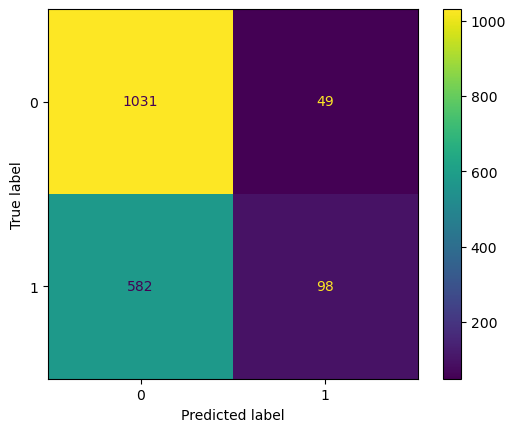

In [345]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
recall

0.14411764705882352

In [348]:
combined

,actual,prediction
203,0,0
204,1,0
205,1,0
206,0,0
207,0,0
...,...,...
5791,0,0
5792,1,0
5793,0,0
5794,0,0


In [349]:
combined = combined.merge(matches_rolling[['date', 'team', 'opponent', 'result']], left_index=True, right_index=True)

In [350]:
combined

,actual,prediction,date,team,opponent,result
203,0,0,2023-01-03,Arsenal,Newcastle Utd,D
204,1,0,2023-01-15,Arsenal,Tottenham,W
205,1,0,2023-01-22,Arsenal,Manchester Utd,W
206,0,0,2023-02-04,Arsenal,Everton,L
207,0,0,2023-02-11,Arsenal,Brentford,D
...,...,...,...,...,...,...
5791,0,0,2025-02-16,Wolverhampton Wanderers,Liverpool,L
5792,1,0,2025-02-22,Wolverhampton Wanderers,Bournemouth,W
5793,0,0,2025-02-25,Wolverhampton Wanderers,Fulham,L
5794,0,0,2025-03-08,Wolverhampton Wanderers,Everton,D


In [351]:
feature_importance = pd.DataFrame({
    'Feature': predictors + new_cols,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

          Feature  Importance
7      sh_rolling    0.267493
8     sot_rolling    0.245600
5      gf_rolling    0.135485
0      venue_code    0.087975
2       team_code    0.082972
6      ga_rolling    0.076208
1        opp_code    0.061345
9    dist_rolling    0.021621
10     fk_rolling    0.012307
12  pkatt_rolling    0.003357
11     pk_rolling    0.002503
3            hour    0.001935
4        day_code    0.001197


<Axes: title={'center': 'Feature Importance'}, xlabel='Feature'>

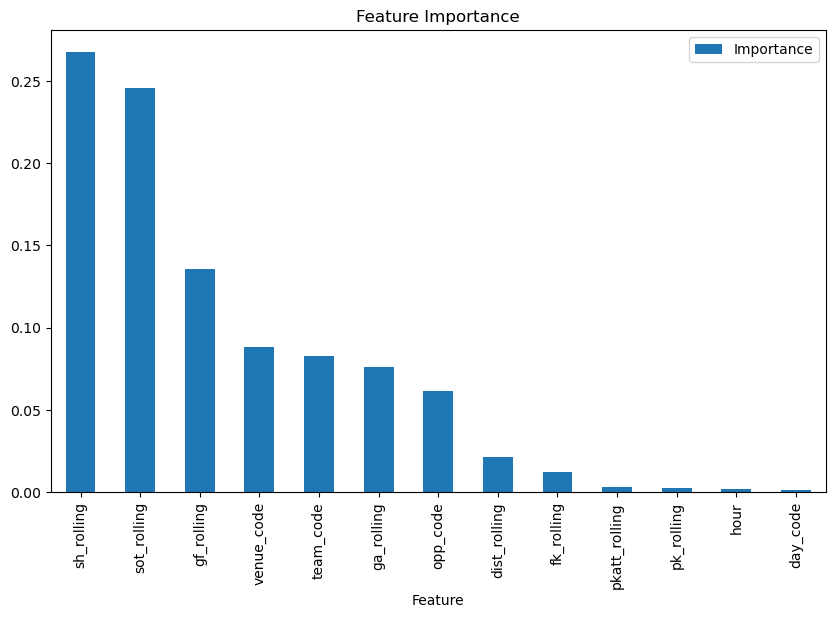

In [361]:
feature_importance.plot.bar(x='Feature', y='Importance', title='Feature Importance', figsize=(10, 6))

In [352]:
class MissingDict(dict):
    __missing__= lambda self, key: key
map_values = {
        "Brighton and Hove Albion": "Brighton",
        "Manchester United": "Manchester Utd",
        "Newcastle United": "Newcastle Utd",
        "Tottenham Hotspur": "Tottenham",
        "West Ham United": "West Ham",
        "Wolverhampton Wanderers": "Wolves",
    }

mapping = MissingDict(**map_values)

In [353]:
mapping["West Ham United"]

'West Ham'

In [354]:
combined['new_team'] = combined['team'].map(mapping)
combined  

,actual,prediction,date,team,opponent,result,new_team
203,0,0,2023-01-03,Arsenal,Newcastle Utd,D,Arsenal
204,1,0,2023-01-15,Arsenal,Tottenham,W,Arsenal
205,1,0,2023-01-22,Arsenal,Manchester Utd,W,Arsenal
206,0,0,2023-02-04,Arsenal,Everton,L,Arsenal
207,0,0,2023-02-11,Arsenal,Brentford,D,Arsenal
...,...,...,...,...,...,...,...
5791,0,0,2025-02-16,Wolverhampton Wanderers,Liverpool,L,Wolves
5792,1,0,2025-02-22,Wolverhampton Wanderers,Bournemouth,W,Wolves
5793,0,0,2025-02-25,Wolverhampton Wanderers,Fulham,L,Wolves
5794,0,0,2025-03-08,Wolverhampton Wanderers,Everton,D,Wolves


In [355]:
merged = combined.merge(combined, left_on=['date', 'new_team'], right_on=['date', 'opponent'])

In [356]:
merged.sample(5)

,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y
798,0,0,2024-04-27,Fulham,Crystal Palace,D,Fulham,0,0,Crystal Palace,Fulham,D,Crystal Palace
1195,0,0,2024-05-06,Manchester United,Crystal Palace,L,Manchester Utd,1,0,Crystal Palace,Manchester Utd,W,Crystal Palace
294,1,0,2023-10-21,Brentford,Burnley,W,Brentford,0,0,Burnley,Brentford,L,Burnley
571,0,0,2023-02-04,Crystal Palace,Manchester Utd,L,Crystal Palace,1,0,Manchester United,Crystal Palace,W,Manchester Utd
1555,1,0,2023-04-25,Wolverhampton Wanderers,Crystal Palace,W,Wolves,0,0,Crystal Palace,Wolves,L,Crystal Palace


In [357]:
actual_x = merged[(merged['prediction_x'] == 1) & (merged['prediction_y'] == 0)]["actual_x"].value_counts()

In [358]:
precision = actual_x.loc[1] / (actual_x.loc[1] + actual_x.loc[0])
precision

0.6785714285714286